<a href="https://colab.research.google.com/github/muhammadefan/just_do_it/blob/main/Classification%20%5BTabular%5D%3A%20Telco%20Customer%20Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Preparation

In [ ]:
PATH = '/content/drive/MyDrive/learningPy/ddb/'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# load dataset
df = pd.read_csv(PATH + 'telco_customer_churn.csv')

# data preview
display(df.head())
df.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)

In [ ]:
# cek missing value
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# cek data duplikat
df.duplicated().sum()

0

**cek tipe data**

In [ ]:
# cek data yang bertipe object/string
print(df.select_dtypes('object').columns, end='\n\n')

# cek data yang bertipe int/float
print(df.select_dtypes(['int64','float64']).columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


```
seharusnya tipe data dari kolom TotalCharges adalah numerik (int/float), coba kita periksa lebih lanjut!
```

In [ ]:
import re

non_number = []
idx = []
for i, row in enumerate(df['TotalCharges']):
  if re.findall('[0-9]{1,}.[0-9]{1,}|[0-9]{1,}', row):
    continue
  else:
    non_number.append(row)
    idx.append(i)

print(non_number, idx)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '] [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [ ]:
# mengkonfirmasi jumlah data yang bukan angka pada kolom TotalCharges
df.query('TotalCharges == " "').shape

(11, 21)

In [ ]:
# drop baris yang bukan angka dari kolom TotalCharges melalui nomor indeksnya
df.drop(idx, axis=0, inplace=True)

df.shape

(7032, 21)

In [ ]:
# ubah tipe data TotalCharges
df['TotalCharges'] = df['TotalCharges'].astype('float')

# cek data yang bertipe object/string
print(df.select_dtypes('object').columns, end='\n\n')

# cek data yang bertipe int/float
print(df.select_dtypes(['int64','float64']).columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


```
tipe data dari setiap kolom sudah sesuai
```

**data proportion**

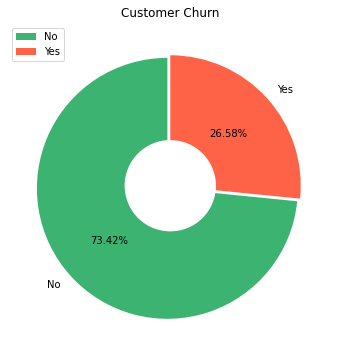

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
labels = df['Churn'].unique().tolist()

ax.pie(x = [val/len(df) for val in df['Churn'].value_counts().values.tolist()],
       explode = [0.03, 0],
       autopct = '%.2f%%',
       labels = labels,
       startangle = 90,
       colors = ['mediumseagreen', 'tomato']
       )

# draw circle
centre_circle = plt.Circle((0,0), 0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set_title('Customer Churn')
ax.set_label(labels)
ax.legend()  # bbox_to_anchor=(1.5,0.8)
plt.show()

fig.savefig('customerchurn.png')

**churn by gender**

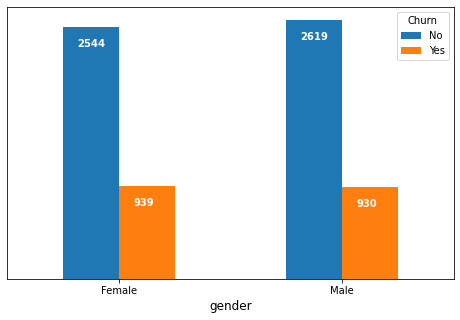

In [ ]:
ax = df.groupby(['gender', 'Churn']).count()['customerID'].unstack().plot(kind='bar', zorder=2, figsize=(8, 5))
for p in ax.patches:
  ax.annotate(p.get_height(),
              (p.get_x()+0.065, p.get_height()-200),
              color = 'white',
              fontweight = 'bold'
              )

# plt.grid(axis='y', zorder=0, linestyle='--')
plt.tick_params(axis='y', labelleft=False, left=False)
plt.xticks(ticks=[0,1], labels=['Female','Male'], rotation=0)
plt.xlabel('gender', fontsize=12)
plt.show()

fig = ax.get_figure()
fig.savefig('churnbygender.png')

**churn by nationality**

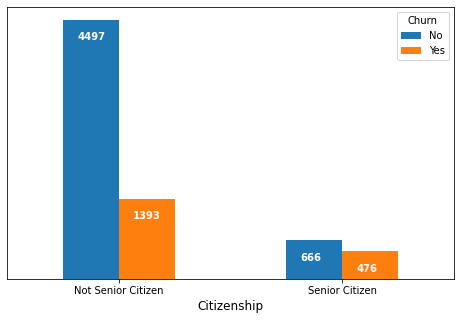

In [ ]:
ax = df.groupby(['SeniorCitizen', 'Churn']).count()['customerID'].unstack().plot(kind='bar', zorder=2, figsize=(8, 5))
for p in ax.patches:
  ax.annotate(p.get_height(),
              (p.get_x()+0.065, p.get_height()-350),
              color = 'white',
              fontweight = 'bold'
              )

# plt.grid(axis='y', zorder=0, linestyle='--')
plt.tick_params(axis='y', labelleft=False, left=False)
plt.xticks(ticks=[0, 1], labels=['Not Senior Citizen', 'Senior Citizen'], rotation=0)
plt.xlabel('Citizenship', fontsize=12)
plt.show()

fig = ax.get_figure()
fig.savefig('churnbycitizen.png')

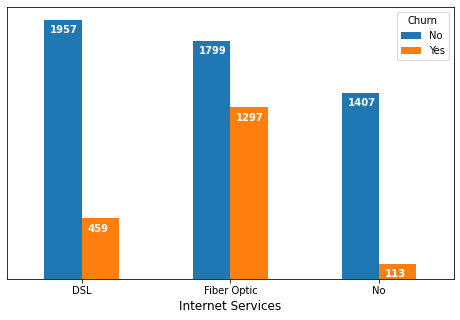

In [ ]:
ax = df.groupby(['InternetService', 'Churn']).count()['customerID'].unstack().plot(kind='bar', zorder=2, figsize=(8, 5))
for p in ax.patches:
  ax.annotate(p.get_height(),
              (p.get_x()+0.038, p.get_height()-100),
              color = 'white',
              fontweight = 'bold'
              )

# plt.grid(axis='y', zorder=0, linestyle='--')
plt.tick_params(axis='y', labelleft=False, left=False)
plt.xticks(ticks=[0, 1, 2], labels=['DSL', 'Fiber Optic', 'No'], rotation=0)
plt.xlabel('Internet Services', fontsize=12)
plt.show()

fig = ax.get_figure()
fig.savefig('churnbyservice.png')

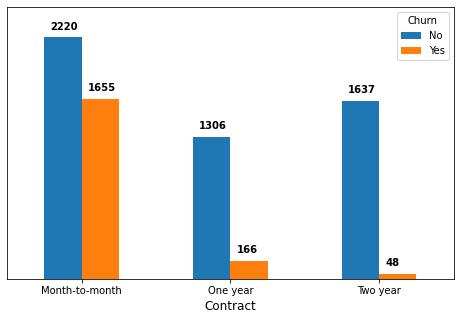

In [ ]:
ax = df.groupby(['Contract', 'Churn']).count()['customerID'].unstack().plot(kind='bar', zorder=2, figsize=(8, 5))
for p in ax.patches:
  ax.annotate(p.get_height(),
              (p.get_x()+0.04, p.get_height()+70),
              color = 'black',
              fontweight = 'bold'
              )

# plt.grid(axis='y', zorder=0, linestyle='--')
plt.tick_params(axis='y', labelleft=False, left=False)
plt.xticks(ticks=[0, 1, 2], labels=['Month-to-month', 'One year', 'Two year'], rotation=0)
plt.yticks(ticks=np.arange(0,2550,500))
plt.xlabel('Contract', fontsize=12)
plt.show()

fig = ax.get_figure()
fig.savefig('churnbycontract.png')

**churn by biaya bulanan**

In [ ]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
mos_charge = df.copy()
mos_charge['MonthlyCharges_Category'] = mos_charge['MonthlyCharges'].apply(lambda x: 0 if x <= df['MonthlyCharges'].quantile(0.25) else 3 if x >= df['MonthlyCharges'].quantile(0.75) else 2)

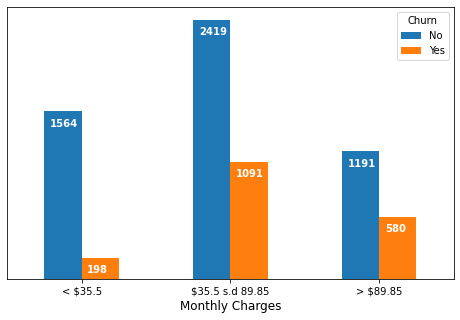

In [ ]:
ax = mos_charge.groupby(['MonthlyCharges_Category', 'Churn']).count()['customerID'].unstack().plot(kind='bar', zorder=2, figsize=(8, 5))
for p in ax.patches:
  ax.annotate(p.get_height(),
              (p.get_x()+0.038, p.get_height()-140),
              color = 'white',
              fontweight = 'bold'
              )

# plt.grid(axis='y', zorder=0, linestyle='--')
plt.tick_params(axis='y', labelleft=False, left=False)
plt.xticks(ticks=[0, 1, 2], labels=['< $35.5', '$35.5 s.d 89.85', '> $89.85'], rotation=0)
plt.xlabel('Monthly Charges', fontsize=12)
plt.show()

fig = ax.get_figure()
fig.savefig('churnbymoscharges.png')

**drop unnecessary column**

In [ ]:
# data customer ID tidak diperlukan karena sifatnya unik
df.drop('customerID', axis=1, inplace=True)
df.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6405,Female,1,No,No,60,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),101.4,6176.6,No


**data encoding**

In [ ]:
# ubah label menjadi angka (label encoding)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [ ]:
# data pada kolom SeniorCitizen akan dilakukan one-hot encoding agar sama dengan fitur lainnya
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [ ]:
# encode data kategorikal
df_encoded = pd.get_dummies(df)

# data preview
display(df_encoded.head())
df_encoded.shape

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


(7032, 47)

#### Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as p

In [ ]:
# ubah urutan kolom
df_encoded = df_encoded[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'] + df_encoded.columns.tolist()[4:]].copy()
df_encoded.sample(1)

,Churn,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2636,0,70,113.0,7987.6,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0


In [ ]:
# descriptive statistics data preview
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


```
data di atas menyatakan bahwa terdapat rentang nilai yang perbedaannya cukup signifikan,
contohnya pada kolom "TotalCharges" dengan nilai minimalnya 18.8 dan nilai maksimalnya hingga 8684.8.

Oleh karena itu perlu dilakukan normalisasi pada data tersebut
```

In [ ]:
# split data: variabel X dan y
X = df_encoded.iloc[:, 1:]
y = df_encoded.loc[:, 'Churn']

In [ ]:
# split data: training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4, stratify=y)

print(X_train.shape, X_test.shape)
print(Counter(y_train))

(6328, 46) (704, 46)
Counter({0: 4646, 1: 1682})


**skenario 1: try different algorithms**

In [ ]:
# evaluate 6 different algorithms
model_list = list([KNeighborsClassifier(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(), MLPClassifier(), XGBClassifier()])

precision_0, precision_1 = [], []
recall_0, recall_1 = [], []
f1_0, f1_1 = [], []
acc = []

for model in model_list:
  pipeline = Pipeline([('scaler', MinMaxScaler()),
                       ('classifier', model)
                       ])
  
  m = pipeline.fit(X_train, y_train)
  y_pred = m.predict(X_test)

  # precision
  precision_0.append(precision_score(y_test, y_pred, pos_label=0, zero_division=True)); precision_1.append(precision_score(y_test, y_pred, pos_label=1, zero_division=True))
  # recall
  recall_0.append(recall_score(y_test, y_pred, pos_label=0, zero_division=True)); recall_1.append(recall_score(y_test, y_pred, pos_label=1, zero_division=True))
  # f1 score
  f1_0.append(f1_score(y_test, y_pred, pos_label=0, zero_division=True)); f1_1.append(f1_score(y_test, y_pred, pos_label=1, zero_division=True))
  # accuracy
  acc.append(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# create dataframe
evaluation = pd.DataFrame(columns = ['model','precision_0','precision_1','recall_0','recall_1','f1-score_0','f1-score_1','accuracy'])

model_name = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'MLP', 'XGBoost']
metrics = [model_name, precision_0, precision_1, recall_0, recall_1, f1_0, f1_1, acc]
for i, metric in enumerate(metrics):
  evaluation.iloc[:,i] = metric
  if i != 0:
    evaluation.iloc[:,i] = [f'{met:.2f}' for met in metric]

# data preview
evaluation.sort_values(by='accuracy', ascending=False)

,model,precision_0,precision_1,recall_0,recall_1,f1-score_0,f1-score_1,accuracy
5,XGBoost,0.86,0.67,0.90,0.58,0.88,0.62,0.81
1,SVM,0.83,0.63,0.90,0.49,0.86,0.55,0.79
2,Decision Tree,0.83,0.62,0.89,0.51,0.86,0.56,0.79
4,MLP,0.83,0.62,0.89,0.50,0.86,0.56,0.79
0,KNN,0.83,0.54,0.84,0.51,0.83,0.52,0.75
3,Random Forest,0.83,0.51,0.82,0.53,0.82,0.52,0.74


**skenario 2: improve the best one**

In [ ]:
pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('classifier', XGBClassifier())
                     ])

# parameter yang dapat dituning
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__feature_range', 'classifier__base_score', 'classifier__booster', 'classifier__colsample_bylevel', 'classifier__colsample_bynode', 'classifier__colsample_bytree', 'classifier__gamma', 'classifier__learning_rate', 'classifier__max_delta_step', 'classifier__max_depth', 'classifier__min_child_weight', 'classifier__missing', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__nthread', 'classifier__objective', 'classifier__random_state', 'classifier__reg_alpha', 'classifier__reg_lambda', 'classifier__scale_pos_weight', 'classifier__seed', 'classifier__silent', 'classifier__subsample', 'classifier__verbosity'])

In [ ]:
# improve model
params = {'classifier__max_depth': [1, 2, 3, 4, 5],
          'classifier__learning_rate': [0.1, 0.01, 0.001],
          'classifier__gamma': [0.9, 1.0, 1.1],
          'classifier__reg_lambda': [8.0, 9.0, 10.0],
}

# find best parameters
tuned_model = GridSearchCV(estimator=pipeline, param_grid=params, cv=4)
tuned_model.fit(X_train, y_train)

# best parameters
print(tuned_model.best_params_)

{'classifier__gamma': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__reg_lambda': 10.0}


In [ ]:
# evaluate model
y_pred = tuned_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       517
         Yes       0.66      0.58      0.62       187

    accuracy                           0.81       704
   macro avg       0.76      0.73      0.74       704
weighted avg       0.80      0.81      0.80       704



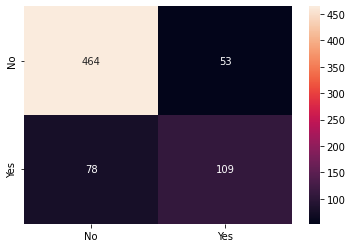

In [ ]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.show()

**feature importances**

In [ ]:
im = model.feature_importances_

In [ ]:
imp_dict = {}

for i, im_value, col in zip(range(len(im)), im, X.columns.values.tolist()):
  # print(im_value, col)
  imp_dict.update({col:im_value})

In [ ]:
cols = []

for i,im_value in enumerate(sorted(imp_dict, reverse=True)):
  cols.append(imp_dict[im_value])

In [ ]:
cols = list(imp_dict.keys())
vals = list(imp_dict.values())

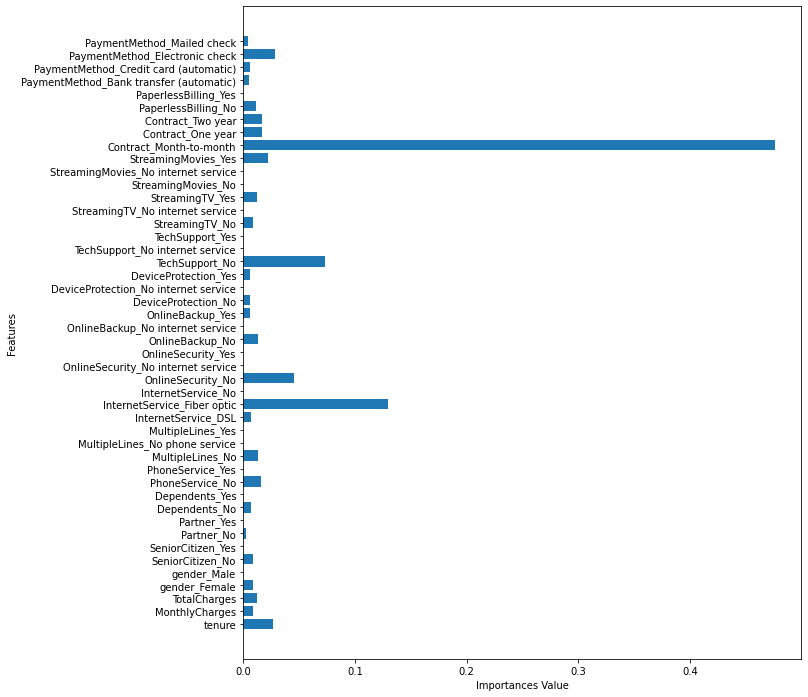

In [ ]:
plt.figure(figsize=(10,12))

plt.barh(y = range(len(imp_dict)),
         width = vals,
         tick_label = cols)

plt.xlabel('Importances Value')
plt.ylabel('Features')
plt.show()

**churn prediction**

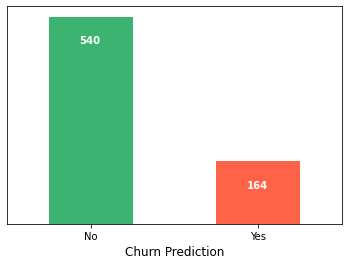

In [ ]:
ax = pd.DataFrame({'pred':y_pred}).value_counts().plot(kind='bar', color=['mediumseagreen', 'tomato'])

for p in ax.patches:
  ax.annotate(p.get_height(),
              (p.get_x()+0.18, p.get_height()-70),
              color = 'white',
              fontweight = 'bold'
              )

plt.tick_params(axis='y', labelleft=False, left=False)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.xlabel('Churn Prediction', fontsize=12)
plt.show()

fig = ax.get_figure()
fig.savefig('pred.png')